In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns 

In [2]:
def warn(*args,**kwargs):
    pass
import warnings
warnings.warn=warn

In [3]:
import warnings
warnings.filterwarnings('ignore',module ='sklearn')

In [5]:
pip install opendatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 936.4 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.4/164.4 kB 3.3 MB/s eta 0:00:00a 0:00:01
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105123 sha256=f0d4c0a926a5f3b099685119891be9f19f90fe05bb2b826f5e520fbe454b65b5
  Stored in directory: /Users/manmohanmanitripathi/Library/Caches/pip/wheels/23/f1/ec/3f9079ada5cc1218f9accf05ccca9f0a57533191e49d76e3f6
Successfully built kaggle
  Attempting uninstall: certifi
    Found existing installation: certifi 2022.9.24
    Uninstalling certifi-2022.9.24:
      Successfully uninstalled certifi-2022.9.24
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but y

In [1]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction")

Skipping, found downloaded files in "./bank-customer-churn-prediction" (use force=True to force download)


In [48]:
data= pd.read_csv("./bank-customer-churn-prediction/Churn_Modelling.csv")

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [49]:
data.drop(columns = ["RowNumber","CustomerId","Surname"],inplace =True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data.shape

(10000, 11)

Text(0, 0.5, 'Frequency')

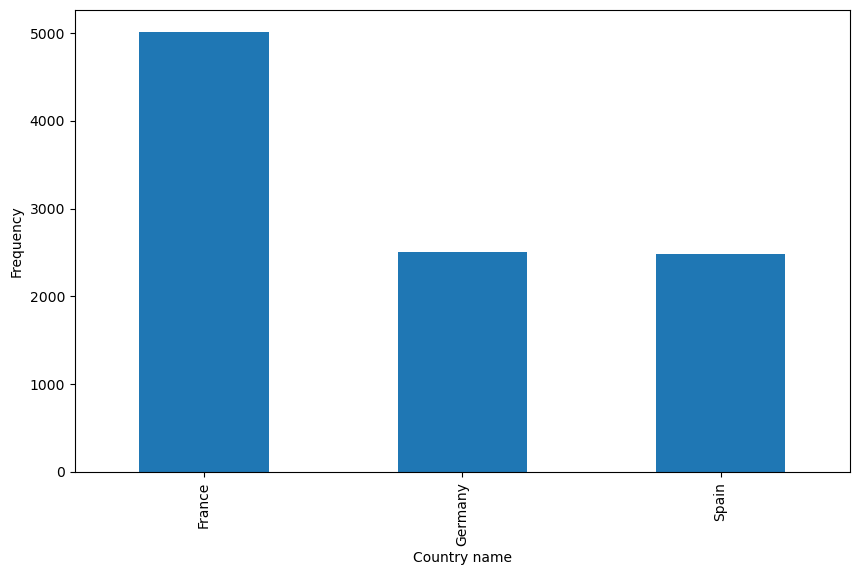

In [11]:
plt.pyplot.figure(figsize=(10,6))
data['Geography'].value_counts().plot(kind= "bar")
plt.pyplot.xlabel("Country name")
plt.pyplot.ylabel("Frequency")

<AxesSubplot:>

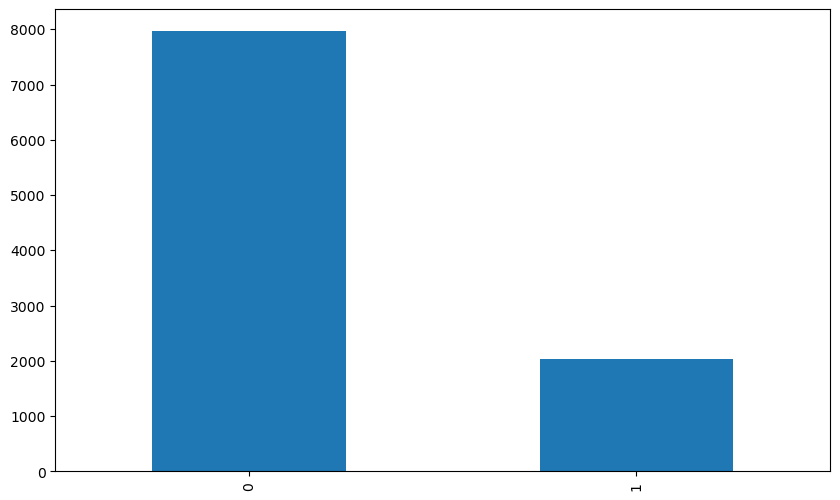

In [12]:
plt.pyplot.figure(figsize=(10,6))
data['Exited'].value_counts().plot(kind= "bar")

<AxesSubplot:>

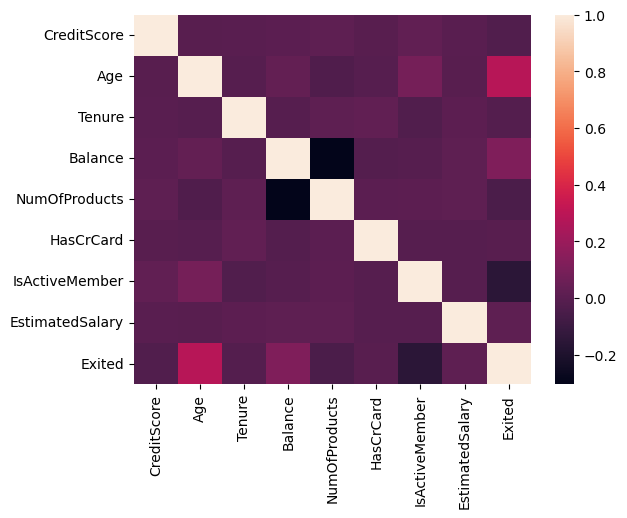

In [50]:
sns.heatmap(data=data.corr())

In [51]:
data.corr()["Exited"].abs().sort_values(ascending = False)

Exited             1.000000
Age                0.285323
IsActiveMember     0.156128
Balance            0.118533
NumOfProducts      0.047820
CreditScore        0.027094
Tenure             0.014001
EstimatedSalary    0.012097
HasCrCard          0.007138
Name: Exited, dtype: float64

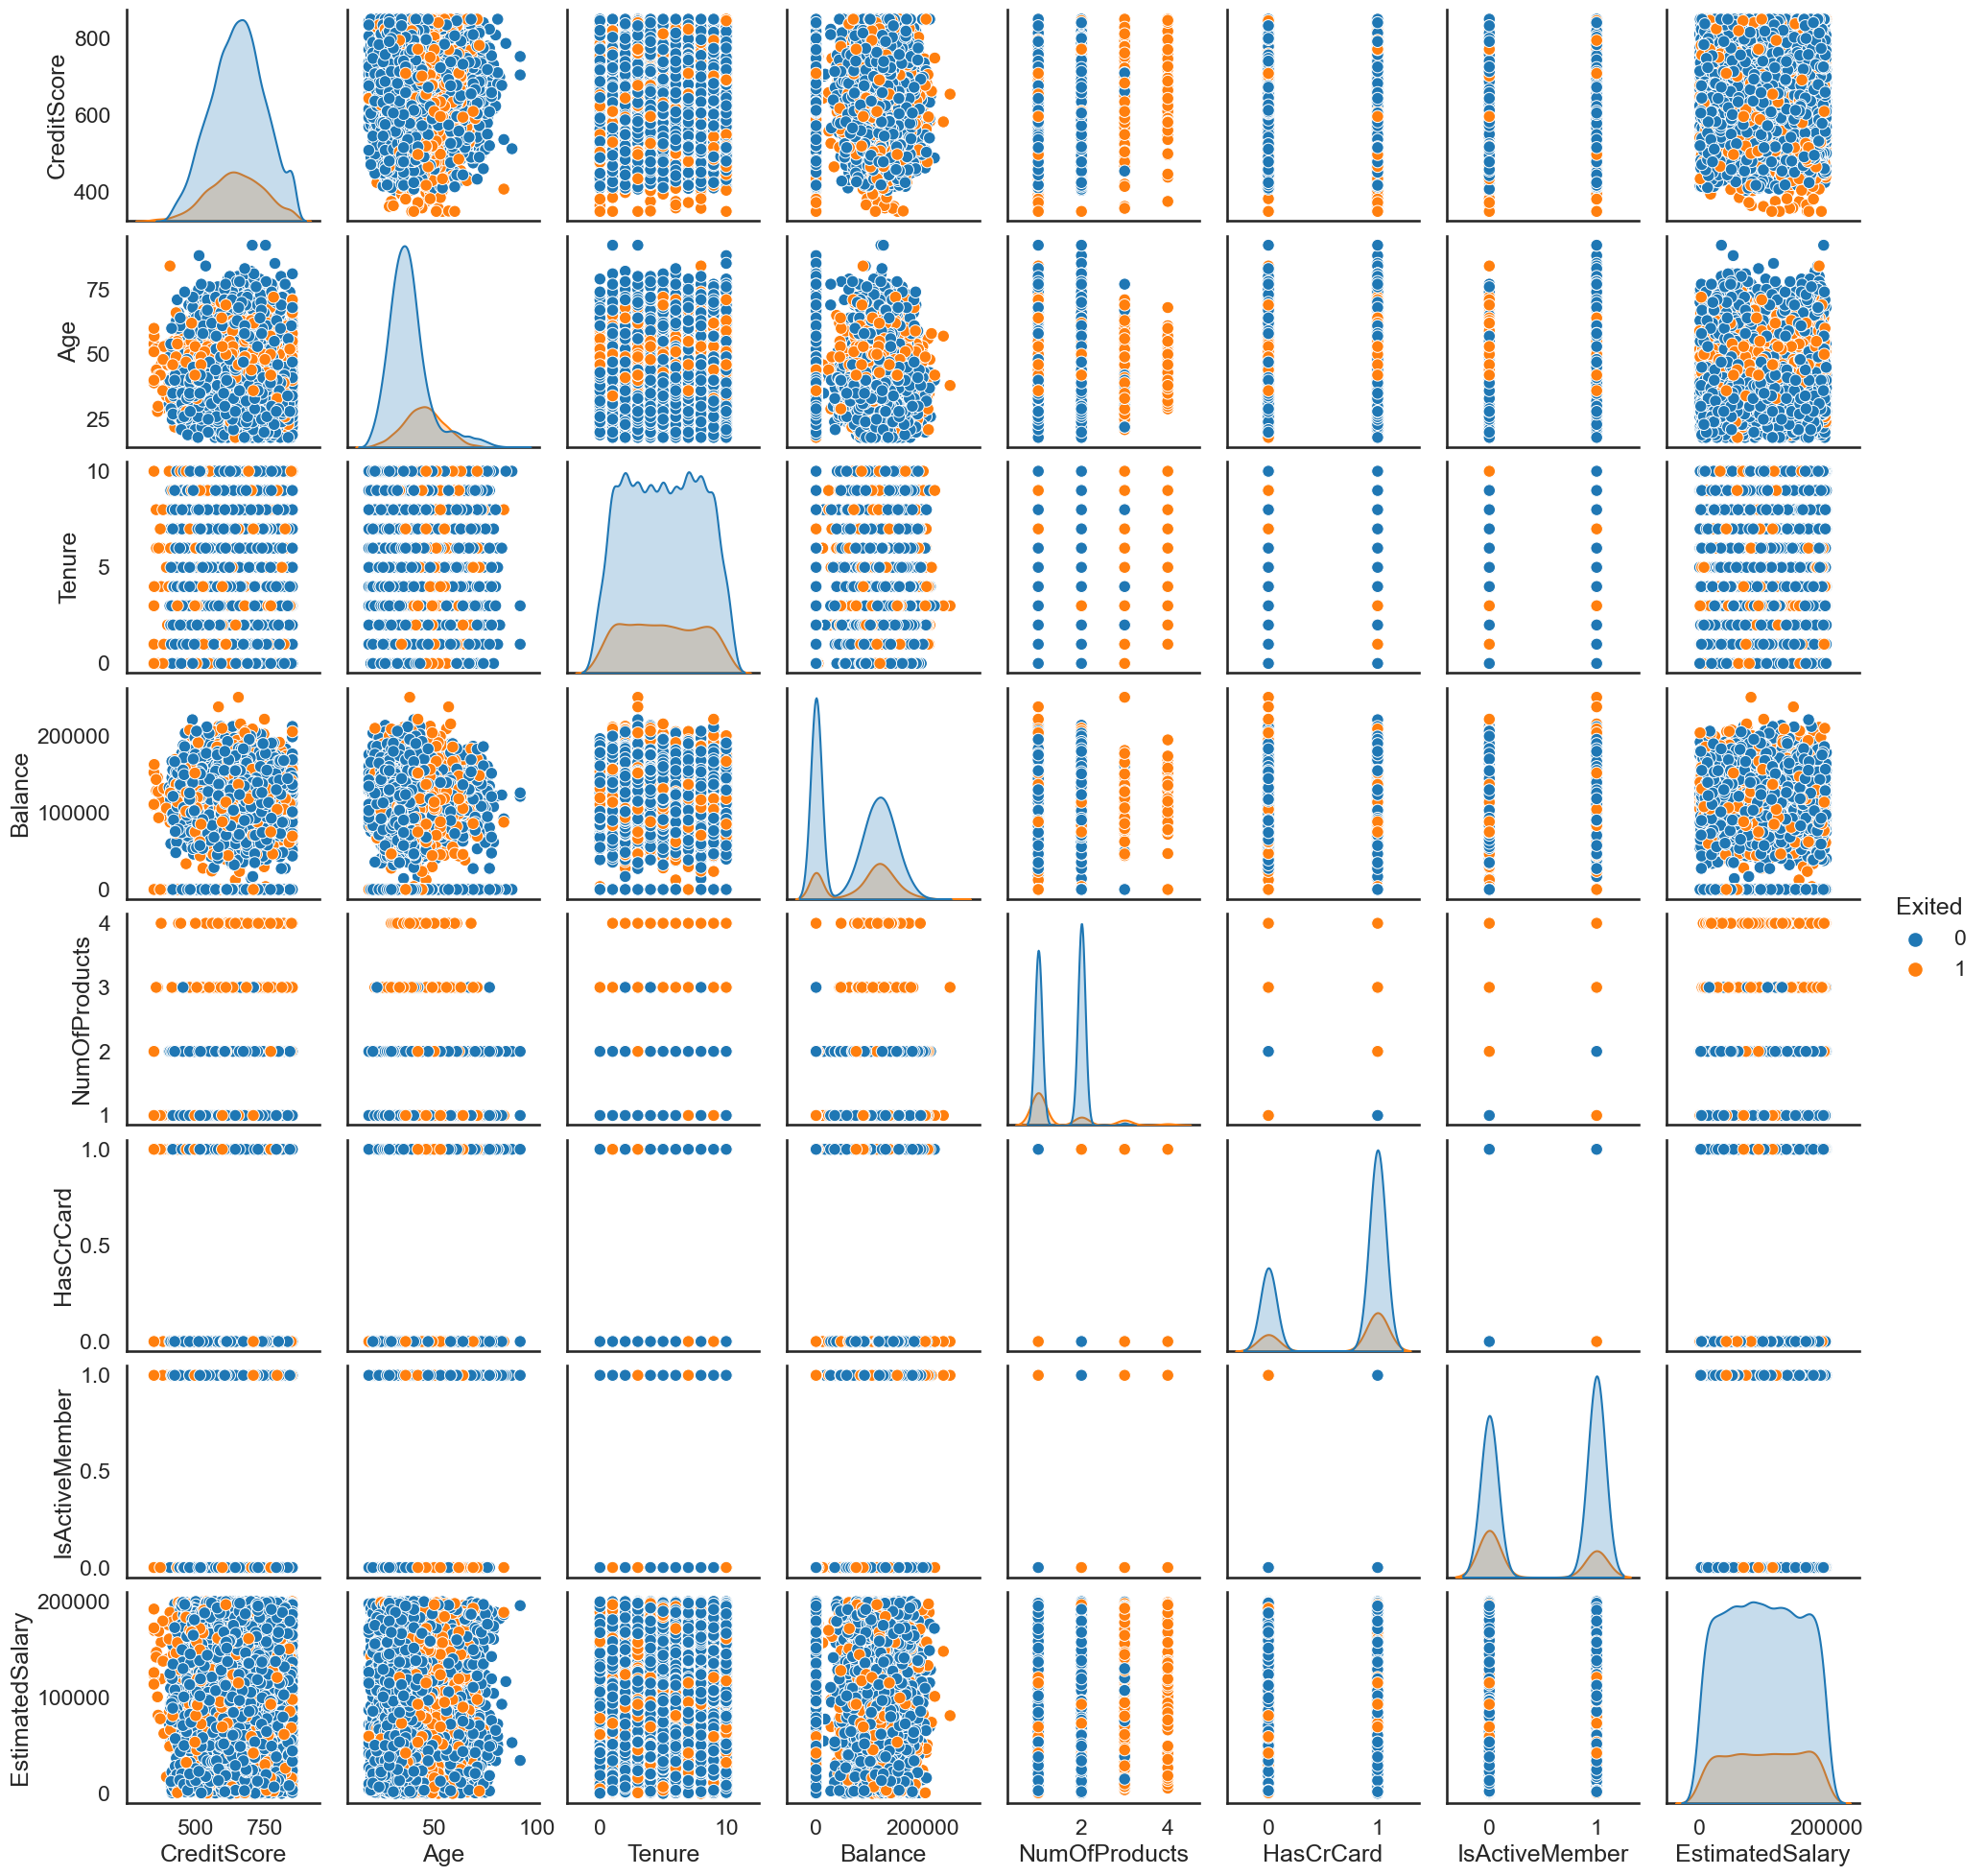

In [52]:
sns.set_context('talk')
sns.set_style('white')
sns.pairplot(data,hue='Exited')

[Text(0, 0.5, 'Pearson Coefficient')]

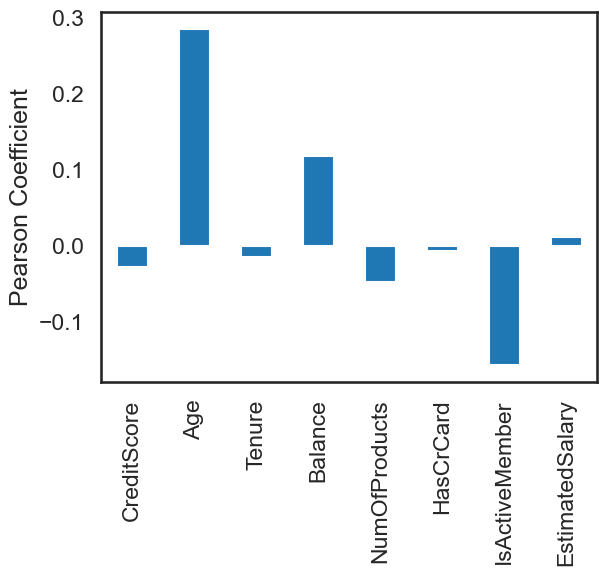

In [55]:
corrval = data.drop(columns = ['Exited']).corrwith(data['Exited'])
ax=corrval.plot(kind='bar')
ax.set(ylabel='Pearson Coefficient')

In [8]:
data = pd.get_dummies(data,columns=['Geography','Gender'])

In [9]:
X= data.drop(columns=["Exited"])
y=data["Exited"]

In [10]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X = ss.fit_transform(X)


In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
para = {'n_estimators' : [2*n+1 for n in range(5)],'max_depth' : [2*n+1 for n in range(20)],'max_features':["auto", "sqrt", "log2"]}

In [21]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV , cross_val_score
skf = StratifiedKFold(n_splits=3,random_state =42,shuffle =True)
gss = GridSearchCV(estimator = model,param_grid = para ,cv=skf,scoring = 'f1')

In [31]:
col =  data.drop(columns = ['Exited']).columns
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[col], data.Exited))

# Create the dataframes
X_train = data.loc[train_idx,col]
y_train = data.loc[train_idx, 'Exited']

X_test  = data.loc[test_idx, col]
y_test  = data.loc[test_idx, 'Exited']

In [32]:
gss.fit(X_train,y_train)


In [36]:
y_predict = gss.predict(X_test)

In [37]:
gss.best_estimator_ , gss.best_score_

(RandomForestClassifier(max_depth=19, max_features='sqrt', n_estimators=9),
 0.5462368312684728)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2389
           1       0.71      0.47      0.57       611

    accuracy                           0.85      3000
   macro avg       0.79      0.71      0.74      3000
weighted avg       0.84      0.85      0.84      3000



In [42]:
accuracy_score(y_test,y_predict)

0.854